# Multi-sites


author: steeve.laquitaine@epfl.ch  
date: 2023.10.13  

Purpose: describe multi-channel spatio-temporal dynamics of action potentials, in vivo.

## Setup

create and activate env from `spikinterf.txt`

In [62]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si
import yaml
import warnings
import spikeinterface.preprocessing as spre
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


# set project path
PROJ_PATH = "/home/steeve/steeve/epfl/code/spikebias"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# # probe 1 (layer 1 and 2/3)
# data_conf, param_conf_sili = get_config(
#     "dense_spont", "probe_1"
# ).values()
# PRE_PATH_1 = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# # probe 2
# data_conf, param_conf_sili = get_config(
#     "dense_spont", "probe_2"
# ).values()
# PRE_PATH_2 = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# # probe 3
# data_conf, param_conf_sili = get_config(
#     "dense_spont", "probe_3"
# ).values()
# PRE_PATH_3 = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# figure parameters
SAVE_FIG = True
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)
    
# plot
PLOT_Y_PITCH = 500          # fixed distance between electrodes on plot for visibility
GAIN_TO_UV = 0.195
ylim = [-2111.4893, 691.5947]

DURATION = 10  # 20  # in ms, 46
NUM = 500 # 1442  # 1430  # 1424  # 1415  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
LINEWIDTH = 0.15
LINEWIDTH_BORD = 0.25
n_timepoints = int(DURATION * SAMPFREQ / 1000)

# FIGURE SETTINGS
COLOR_HS = np.array([26, 152, 80]) / 255 # green
LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1

# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## L1,2/3

### Load dataset

In [63]:
%%time 

if SAVE_FIG_DATA:
    
    # find a common period with large voltage trace across layers
    PERIOD = np.arange(18040134 - n_timepoints/2, 18040134+ n_timepoints/2, 1).astype(int)

    # get preprocessed voltage traces and electrode layers
    Recording = si.load_extractor('dataset/00_raw/recording_dense_probe1')
    Recording = spre.highpass_filter(Recording, freq_min=300)
    Recording = spre.common_reference(Recording, reference='global', operator='median')
    layers = Recording.get_property("layers")
    prep_traces = Recording.get_traces()
    fig_data = {"trace": prep_traces[PERIOD, :], "layers": layers}
        
    # save figure data
    np.save(fig_data_paths["fig2l_spacetime_custom_biophy_l1_2_3"], fig_data)

elif LOAD_FIG_DATA:

    # load figure data
    fig_data = np.load(fig_data_paths["fig2l_spacetime_custom_biophy_l1_2_3"], allow_pickle=True).item()        
    print(fig_data_paths["fig2l_spacetime_custom_biophy_l1_2_3"])

dataset/02_figure_dataset/fig2l_spacetime_custom_biophy_l1_2_3.npy
CPU times: user 265 µs, sys: 44 µs, total: 309 µs
Wall time: 214 µs


In [64]:
# count site per column
site_per_col = int(len(fig_data["layers"]) / 4)

# get layers layout
col1_site_out = np.where(fig_data["layers"][:site_per_col] == "Outside")[0]
col1_site_l1 = np.where(fig_data["layers"][:site_per_col] == "L1")[0]
col1_site_l2_3 = np.where((fig_data["layers"][:site_per_col] == "L2_3"))[0]
col1_site_l4 = np.where(fig_data["layers"][:site_per_col] == "L4")[0]
col1_site_l5 = np.where(fig_data["layers"][:site_per_col] == "L5")[0]
col1_site_l6 = np.where(fig_data["layers"][:site_per_col] == "L6")[0]

# find common ylim to set all voltage traces to
ymax = fig_data["trace"][:, np.hstack([col1_site_l2_3, col1_site_l1])].max()
ymin = fig_data["trace"][:, np.hstack([col1_site_l2_3, col1_site_l1])].min()
print(ymax, ymin)

# scale voltage trace with Horvath gain
scaled = np.array(ylim)*GAIN_TO_UV
print("gain to uV:", scaled)

# report the voltage scale of all axes (the ylimits) 
print("the voltage scale of all plotted axes is:", np.round(scaled[1] - scaled[0]), "uV")

103.2097 -118.68158
gain to uV: [-411.7404135  134.8609665]
the voltage scale of all plotted axes is: 547.0 uV


number of sites shown: 26


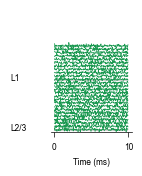

In [65]:
n_sites_l123 = len(col1_site_l1) + len(col1_site_l2_3)
fig_vert_size_l123 = 1.6

FIGSIZE = (1.05, fig_vert_size_l123)  # DO NOT CHANGE!! Calibrated for preprint figure

PLOT_Y_PITCH = 100
Y_MAX = PLOT_Y_PITCH * (site_per_col - 1)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0

save_trace_data = []

for contact_i in np.arange(0, site_per_col, 1):
    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L2/3"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L1"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # in target layer
    if contact_i in col1_site_l1:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:,contact_i])

    if contact_i in col1_site_l2_3:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:,contact_i])

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

print("number of sites shown:", c_site)

number of sites shown: 26


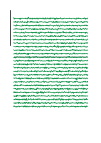

In [66]:
# setup plot
n_sites = len(col1_site_l1) + len(col1_site_l2_3)
fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# delimit layer 4 and 5
sites = np.hstack([col1_site_l1, col1_site_l2_3])
l23_ix = np.where(sites == col1_site_l2_3[0])[0]

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_HS)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].spines[["left", "right", "top","bottom"]].set_visible(False)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background

    # delimit sites from layer 4 and 5
    if site==l23_ix:
        ax[site].hlines(
            y=10,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
print("number of sites shown:", n_sites)

# show voltage scale
ax[0].spines[["left"]].set_visible(True)

# label
#ax[n_sites-1].set_xlabel("Time (ms)");

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l1_2_3.svg",
        **savefig_cfg
    )

## L4 and 5

### Load dataset

In [67]:
%%time 

if SAVE_FIG_DATA:
    
    # find a common period with large voltage trace across layers
    PERIOD = np.arange(18040134 - n_timepoints/2, 18040134+ n_timepoints/2, 1).astype(int)

    # get preprocessed voltage traces and electrode layers
    Recording = si.load_extractor('dataset/00_raw/recording_dense_probe2')
    Recording = spre.highpass_filter(Recording, freq_min=300)
    Recording = spre.common_reference(Recording, reference='global', operator='median')
    layers = Recording.get_property("layers")
    prep_traces = Recording.get_traces()
    
    fig_data = {"trace": prep_traces[PERIOD, :], "layers": layers}    
            
    # save figure data
    np.save(fig_data_paths["fig2l_spacetime_custom_biophy_l4_5"], fig_data)

elif LOAD_FIG_DATA:    
    
    # load figure data
    fig_data = np.load(fig_data_paths["fig2l_spacetime_custom_biophy_l4_5"], allow_pickle=True).item()        

CPU times: user 560 µs, sys: 93 µs, total: 653 µs
Wall time: 213 µs


In [68]:
# # find sample and site col among l4 and 5 of max trace voltage
# idx = np.argmin(prep_traces[:, np.hstack([col1_site_l4, col1_site_l5])])
# sample, col = np.unravel_index(idx, prep_traces[:, np.hstack([col1_site_l4, col1_site_l5])].shape)
# site = np.hstack([col1_site_l4, col1_site_l5])[col]
# print(sample)
# print(col)

# count site per column
site_per_col = int(len(fig_data["layers"]) / 4)

# get layers layout
col1_site_out = np.where(fig_data["layers"][:site_per_col] == "Outside")[0]
col1_site_l1 = np.where(fig_data["layers"][:site_per_col] == "L1")[0]
col1_site_l2_3 = np.where((fig_data["layers"][:site_per_col] == "L2_3"))[0]
col1_site_l4 = np.where(fig_data["layers"][:site_per_col] == "L4")[0]
col1_site_l5 = np.where(fig_data["layers"][:site_per_col] == "L5")[0]
col1_site_l6 = np.where(fig_data["layers"][:site_per_col] == "L6")[0]

# find common ylim to set all voltage traces to
ymax = fig_data["trace"][:,np.hstack([col1_site_l4, col1_site_l5])].max()
ymin = fig_data["trace"][:,np.hstack([col1_site_l4, col1_site_l5])].min()
print(ymax, ymin)

691.5947 -2111.4893


number of sites shown: 31


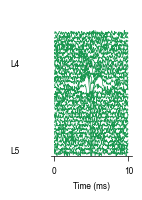

In [69]:
n_sites_l4_5 = len(col1_site_l4) + len(col1_site_l5)
keep_size_ratio = (n_sites_l4_5 * fig_vert_size_l123)/n_sites_l123

FIGSIZE = (1.05, keep_size_ratio)  # DO NOT CHANGE!! Calibrated for figure

Y_MAX = PLOT_Y_PITCH * (site_per_col - 1)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0

save_trace_data = []

for contact_i in np.arange(0, site_per_col, 1):
    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L4"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L5"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # in target layer
    if contact_i in col1_site_l4:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:,contact_i])

    if contact_i in col1_site_l5:
        c_site += 1
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:,contact_i])

ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

print("number of sites shown:", c_site)


number of sites shown: 31


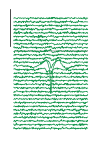

In [70]:
# setup plot
n_sites = len(col1_site_l4) + len(col1_site_l5)
fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# delimit layer 4 and 5
sites = np.hstack([col1_site_l4, col1_site_l5])
l5_ix = np.where(sites == col1_site_l5[0])[0]

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_HS)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background
    ax[flipped_site].spines[["left", "right", "top","bottom"]].set_visible(False)

    # delimit sites from layer 4 and 5
    if site==l5_ix:
        ax[site].hlines(
            y=10,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
print("number of sites shown:", n_sites)

# show voltage scale (ymin and ymax voltage)
ax[0].spines[["left"]].set_visible(True)

# label
#ax[n_sites-1].set_xlabel("Time (ms)");

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l4_5.svg",
        **savefig_cfg
    )

## L6

In [71]:
%%time 

if SAVE_FIG_DATA:

    # find a common period with large voltage trace across layers
    PERIOD = np.arange(18040134 - n_timepoints/2, 18040134 + n_timepoints/2, 1).astype(int)

    # get preprocessed voltage traces and electrode layers
    Recording = si.load_extractor('dataset/00_raw/recording_dense_probe3')
    Recording = spre.highpass_filter(Recording, freq_min=300)
    Recording = spre.common_reference(Recording, reference='global', operator='median')
    layers = Recording.get_property("layers")
    prep_traces = Recording.get_traces()
    
    fig_data = {"trace": prep_traces[PERIOD, :], "layers": layers}    
    
    # save figure data
    np.save(fig_data_paths["fig2l_spacetime_custom_biophy_l6"], fig_data)

elif LOAD_FIG_DATA:    
    
    # load figure data
    fig_data = np.load(fig_data_paths["fig2l_spacetime_custom_biophy_l6"], allow_pickle=True).item()        
    print(fig_data_paths["fig2l_spacetime_custom_biophy_l6"])

dataset/02_figure_dataset/fig2l_spacetime_custom_biophy_l6.npy
CPU times: user 370 µs, sys: 1.17 ms, total: 1.54 ms
Wall time: 496 µs


In [72]:
# count the number of sites per column
site_per_col = int(len(fig_data['layers']) / 4)
col1_site_out = np.where(fig_data['layers'][:site_per_col] == "Outside")[0]
col1_site_l6 = np.where(fig_data['layers'][:site_per_col] == "L6")[0]

# find common ylim to set all voltage traces to
ymax = fig_data["trace"][:, col1_site_l6].max()
ymin = fig_data["trace"][:, col1_site_l6].min()
print(ymax, ymin)

127.5161 -122.88377


number of sites shown: 19


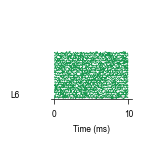

In [73]:
n_sites_l6 = len(col1_site_l6)
keep_size_ratio = (n_sites_l6 * fig_vert_size_l123)/n_sites_l123
FIGSIZE = (1.05, keep_size_ratio)  # DO NOT CHANGE!! Calibrated for figure

Y_MAX = PLOT_Y_PITCH * (site_per_col - 1)

# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
c_site = 0

# record plotted traces
save_trace_data = []

for contact_i in np.arange(0, site_per_col, 1):
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -120,
            0.99 * pos_up,
            "%s" % ("L6"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # in target layer
    if contact_i in col1_site_l6:
        c_site += 1
        ax.plot(
            fig_data['trace'][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_HS,
        )
        pos_up += PLOT_Y_PITCH

        # record plotted traces
        save_trace_data.append(fig_data["trace"][:,contact_i])

# legend
ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-80, Y_MAX + 500])
plt.yticks([])

print("number of sites shown:", c_site)

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l6.svg",
        **savefig_cfg
    )

number of sites shown: 19


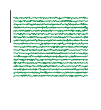

In [74]:
# make sure all voltage traces are on the same voltage scale
# setup plot
n_sites = len(col1_site_l6)
fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_HS)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background
    ax[flipped_site].spines[["left", "right", "top", "bottom"]].set_visible(False)

# # add labels
# ax[site].set_xticks([0, n_timepoints])
# ax[site].set_xticklabels([0, DURATION])
# ax[site].set_xlabel("Time (ms)")
# ax[site].spines[["bottom"]].set_visible(True)

# show voltage scale
ax[0].spines[["left"]].set_visible(True)

print("number of sites shown:", n_sites)

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2l_spacetime_custom_biophy_l6.svg",
        **savefig_cfg
    )